# Objectives 
1. Intro to Unsupervised Learning 
2. Intro Kmeans Algorithm 
3. Take a look at several ways to visualize your kmeans clustering algorithm:
    - Clusters 
    - Elbow method 
    - Yellowbrick 
    - Silhouette
    
4. Hierarchical and Density based Clustering
5. Color Compression


## Unsupervised Learning 

No labels are given to the learning algorithm, leaving it on its own to find structure in its input. Unsupervised learning can be a goal in itself (discovering hidden patterns in data) or a means towards an end (feature learning).
![](https://learn.g2.com/hs-fs/hubfs/unsupervised-learning.png?width=700&name=unsupervised-learning.png)

## K-means Clustering 

K-means is a partitional clustering algorithm - it divides data objects into non-overlapping groups. No object can be a member of more than 1 cluster and each cluster must have at least 1 object. These techniques require the user to specify the number of clusters, indicated by the variable k. Many partitional clustering algorithms work through an iterative process to assign subsets of data points into k clusters. 

These algorithms are both **nondeterministic**, meaning they could produce different results from two separate runs even if the runs were based on the same input.

Partitional clustering methods have several strengths:

- They work well when clusters have a spherical shape.
- They’re scalable with respect to algorithm complexity.

They also have weaknesses:

- They’re not well suited for clusters with complex shapes and different sizes.
- They break down when used with clusters of different densities.

**What are the 2 main objectives of a k-means algorithm?** 

- Similarity amoung clusters 
- dissimilarity among other clusters 

![](https://miro.medium.com/max/1400/1*dcWOeMRD1JMAoe7O9Ien0Q.png)

In [1]:
%matplotlib inline
from IPython.display import Image
import matplotlib.pyplot as plt

### (a) Create Clusters
Generate a distribution of 8 clusters with 250 samples and plot them as a scatterplot. How many clusters do you recognize with your eye. Try to change the cluster standard deviation cluster_std until it will be hard for you to discriminate the 8 different clusters.

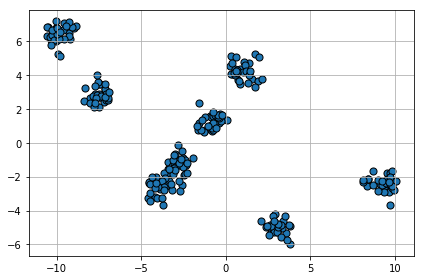

In [5]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=250, 
                  n_features=8, 
                  centers=8, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)

plt.scatter(X[:, 0], X[:, 1], 
             marker='o', edgecolor='black', s=50)
plt.grid()
plt.tight_layout()
plt.show()

### b) `KMeans`
Import the method `KMeans` from `sklearn.cluster`. Instantiate a model km with 8 clusters(`n_clusters=8`). Set the maximum number of iterations to `max_iter=300` and `n_init=10`.

In [6]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=8, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)
km.inertia_

458.6509857505968

### (c) Display the clustered data

Use the function `PlotClusters` to display the clustered data.

In [7]:
from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
ColorNames=list(colors.keys())
HSV=colors.values()


def PlotClusters(X,y, km):
    
    for ClusterNumber in range(km.n_clusters):
        plt.scatter(X[y_km == ClusterNumber, 0],
                X[y_km == ClusterNumber, 1],
                s=50, c=ColorNames[ClusterNumber+1],
                marker='s', edgecolor='black',
                label='cluster {0}'.format(ClusterNumber+1))
    plt.scatter(km.cluster_centers_[:, 0],
        km.cluster_centers_[:, 1],
        s=250, marker='*',
        c='red', edgecolor='black',
        label='centroids')
    plt.legend(scatterpoints=1)
    plt.grid()
    plt.tight_layout()
    #plt.savefig('images/11_02.png', dpi=300)
    plt.show()

### d) Variation of the number k of clusters 

Vary the number of clusters `n_clusters=8` in your `KMeans` clustering algorithm from 4 to 8 and display each time the result using the function `PlotClusters`.

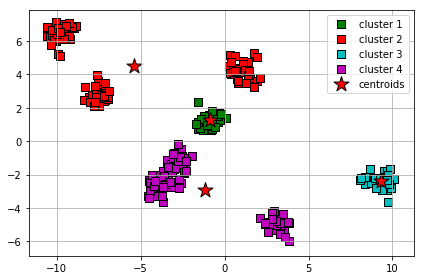

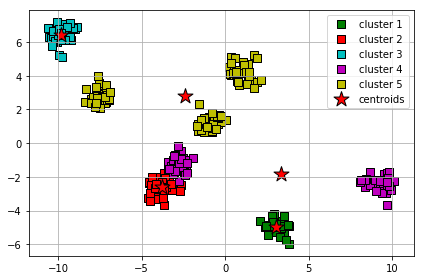

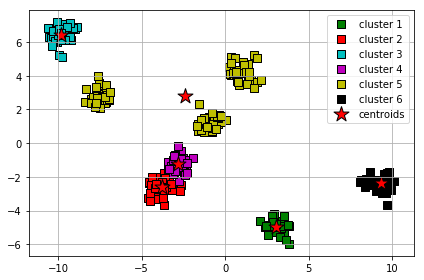

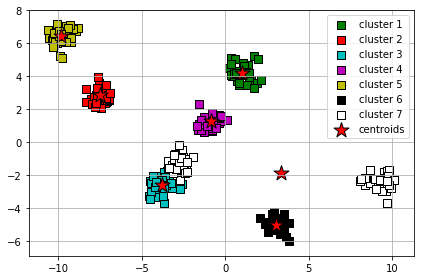

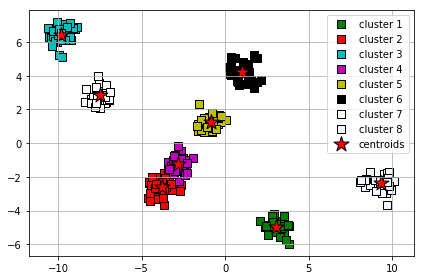

In [8]:
for n_clusters in range(4,9):
    km = KMeans(n_clusters=n_clusters,
                init='random', 
                n_init=10, 
                max_iter=300,
                tol=1e-04,
                random_state=0)

    y_km = km.fit_predict(X)
    PlotClusters(X,y, km)

## Using the elbow method to find the optimal number of clusters 

### (e) Elbow Method

In [9]:
#Sum of squared distances of samples to their closest cluster center - euclidean distance
print('Distortion: %.2f' % km.inertia_)

Distortion: 458.65


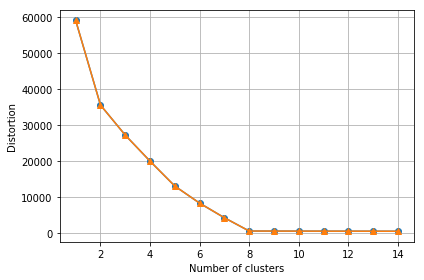

In [10]:
distortions = []
ScoreList   = []
maxNumberOfClusters=15

for i in range(1, maxNumberOfClusters):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
    ScoreList.append(-km.score(X))
    
    
plt.plot(range(1, maxNumberOfClusters), distortions, marker='o')
plt.plot(range(1, maxNumberOfClusters), ScoreList, marker='^')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.grid(True)
#plt.savefig('images/11_03.png', dpi=300)
plt.show()

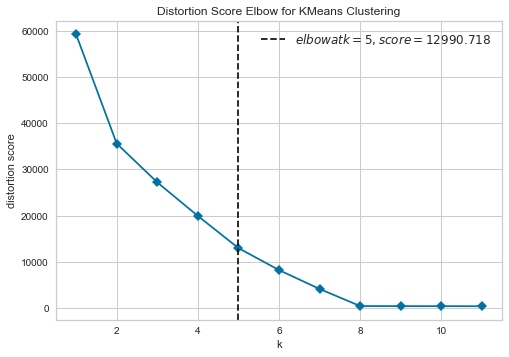

In [11]:
##  install yellowbrck library -- pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()

visualizer = KElbowVisualizer(model, k=(1,12), timings=False)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()  
plt.show()

/Users/amberyandow/anaconda3/envs/learn-env/lib/python3.6/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/Users/amberyandow/anaconda3/envs/learn-env/lib/python3.6/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


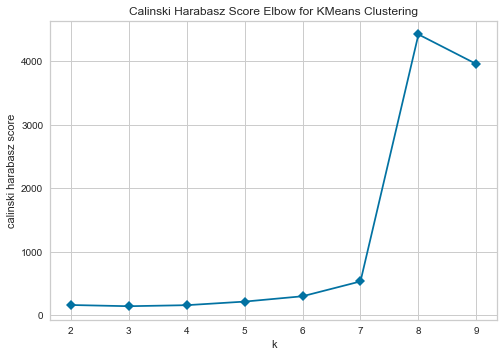

In [12]:
# Instantiate the clustering model and visualizer
# The score is defined as ratio between the within-cluster dispersion and the between-cluster dispersion.

model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,10), metric='calinski_harabasz', timings=False
)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()  
plt.show()

[Sklearn documention on calinski_harabasz score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html)

## Quantifying the quality of clustering  via silhouette plots

- Silhouette score for a set of sample data points is used to measure how dense and well-separated the clusters are.
- Silhouette score takes into consideration the intra-cluster distance between the sample and other data points within the same cluster (a) and inter-cluster distance between the sample and the next nearest cluster (b).
- The silhouette score falls within the range [-1, 1].
- The silhouette score of 1 means that the clusters are very dense and nicely separated. The score of 0 means that clusters are overlapping. The score of less than 0 means that data belonging to clusters may be wrong/incorrect.
- The silhouette plots can be used to select the most optimal value of the K (no. of cluster) in K-means clustering.
- The aspects to look out for in Silhouette plots are cluster scores below the average silhouette score, wide fluctuations in the size of the clusters, and also the thickness of the silhouette plot.


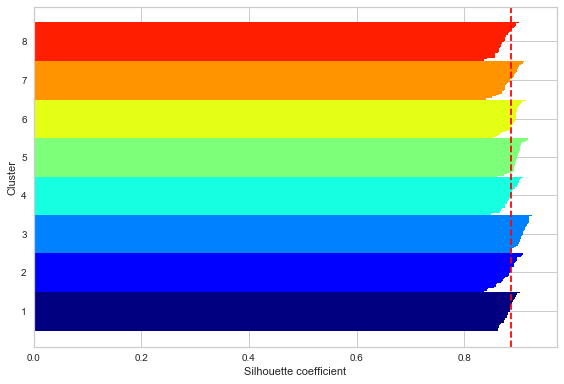

In [16]:
from sklearn.metrics import silhouette_samples
from matplotlib import cm
import numpy as np

km = KMeans(n_clusters=8, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
#plt.savefig('images/11_04.png', dpi=300)
plt.show()

# Locating regions of high density via [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) and [Heirarchical Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

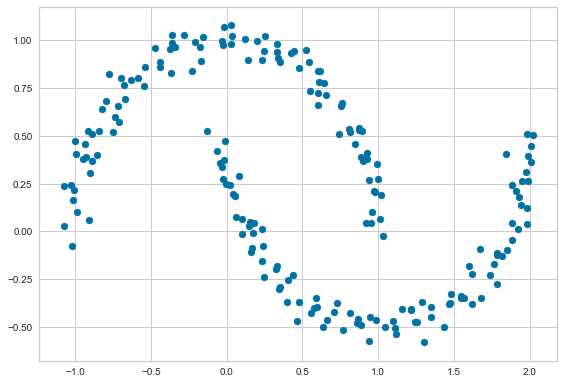

In [17]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.tight_layout()
#plt.savefig('images/11_14.png', dpi=300)
plt.show()

## Hierarchical Clustering

Hierarchical clustering determines cluster assignments by building a hierarchy. This is implemented by either a bottom-up or a top-down approach:

- **Agglomerative clustering** is the bottom-up approach. It merges the two points that are the most similar until all points have been merged into a single cluster.

- **Divisive clustering** is the top-down approach. It starts with all points as one cluster and splits the least similar clusters at each step until only single data points remain.

These methods produce a tree-based hierarchy of points called a **dendrogram**. Similar to partitional clustering, in hierarchical clustering the number of clusters (k) is often predetermined by the user. Clusters are assigned by cutting the dendrogram at a specified depth that results in k groups of smaller dendrograms.

Unlike many partitional clustering techniques, hierarchical clustering is a deterministic process, meaning cluster assignments won’t change when you run an algorithm twice on the same input data.

The **strengths** of hierarchical clustering methods include the following:

- They often reveal the finer details about the relationships between data objects.
- They provide an interpretable dendrogram.

The **weaknesses** of hierarchical clustering methods include the following:

- They’re computationally expensive with respect to algorithm complexity.
- They’re sensitive to noise and outliers.

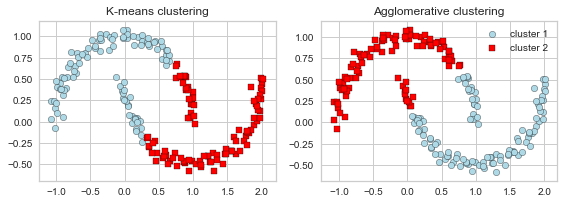

In [18]:
from sklearn.cluster import AgglomerativeClustering

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
            edgecolor='black',
            c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
            edgecolor='black',
            c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')

ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], c='lightblue',
            edgecolor='black',
            marker='o', s=40, label='cluster 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], c='red',
            edgecolor='black',
            marker='s', s=40, label='cluster 2')
ax2.set_title('Agglomerative clustering')

plt.legend()
plt.tight_layout()
# plt.savefig('images/11_15.png', dpi=300)
plt.show()

## Density-Based Clustering

**Density-based clustering** determines cluster assignments based on the density of data points in a region. Clusters are assigned where there are high densities of data points separated by low-density regions.

Unlike the other clustering categories, this approach doesn’t require the user to specify the number of clusters. Instead, there is a distance-based parameter that acts as a tunable threshold. This threshold determines how close points must be to be considered a cluster member.

Examples of density-based clustering algorithms include Density-Based Spatial Clustering of Applications with Noise, or DBSCAN, and Ordering Points To Identify the Clustering Structure, or OPTICS.

The **strengths** of density-based clustering methods include the following:

- They excel at identifying clusters of nonspherical shapes.
- They’re resistant to outliers.

The **weaknesses** of density-based clustering methods include the following:

- They aren’t well suited for clustering in high-dimensional spaces.
- They have trouble identifying clusters of varying densities.

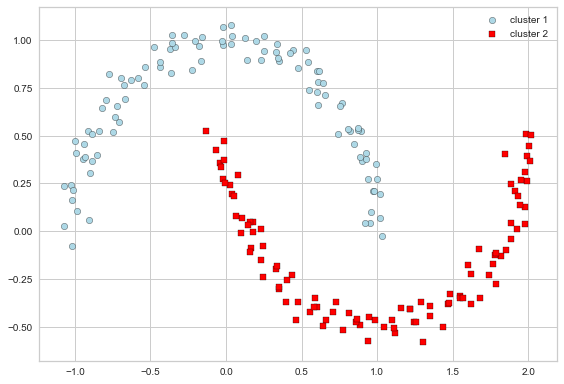

In [19]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='cluster 2')
plt.legend()
plt.tight_layout()
#plt.savefig('images/11_16.png', dpi=300)
plt.show()

### An interesting application of clustering: Color compression
One interesting application of clustering is supposed to be color image compression. For example, imagine you have an image with millions of colors. In most images, a large number of the colors will be unused, and conversely a large number of pixels will have similar or identical colors. Clustering can help find Ncolor clusters in the data, and we can use this to create a new image where the true input color is replaced by the color of the closest cluster.

**Why does Image Segmentation even matter?**

If we take an example of Autonomous Vehicles, they need sensory input devices like cameras, radar, and lasers to allow the car to perceive the world around it, creating a digital map. Autonomous driving is not even possible without object detection which itself involves image classification/segmentation.

![](https://miro.medium.com/max/1000/1*GbFzGi-QWi28vawIxOZxfg.gif)

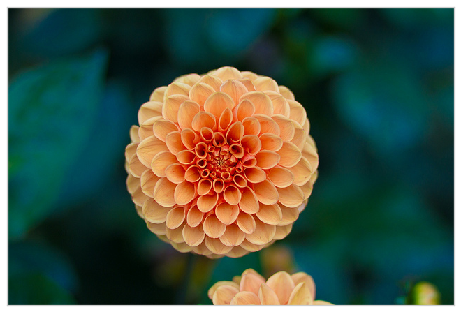

In [20]:
from sklearn.datasets import load_sample_image

flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);


An image is made up of several intensity values known as Pixels. In a colored image, each pixel is of 3 bytes containing RGB (Red-Blue-Green) values having Red intensity value, then Blue and then Green intensity value for each pixel.

In [21]:
print(flower.shape)
data = flower / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
print(data.shape)

(427, 640, 3)
(273280, 3)


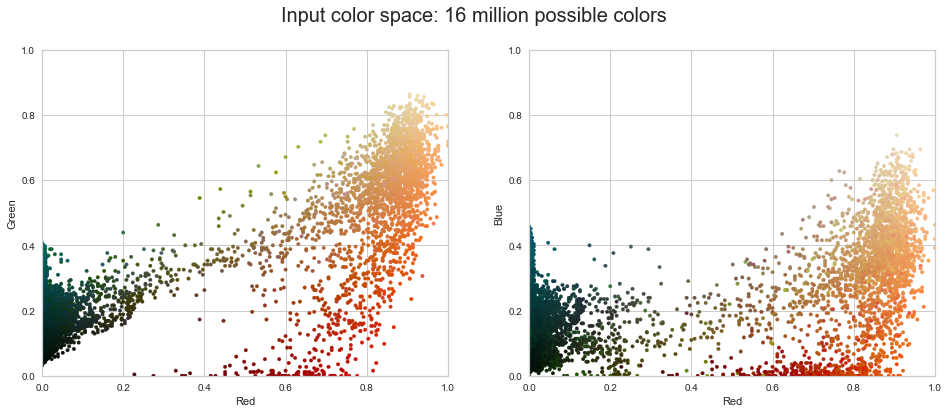

In [22]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);
    
plot_pixels(data, title='Input color space: 16 million possible colors')


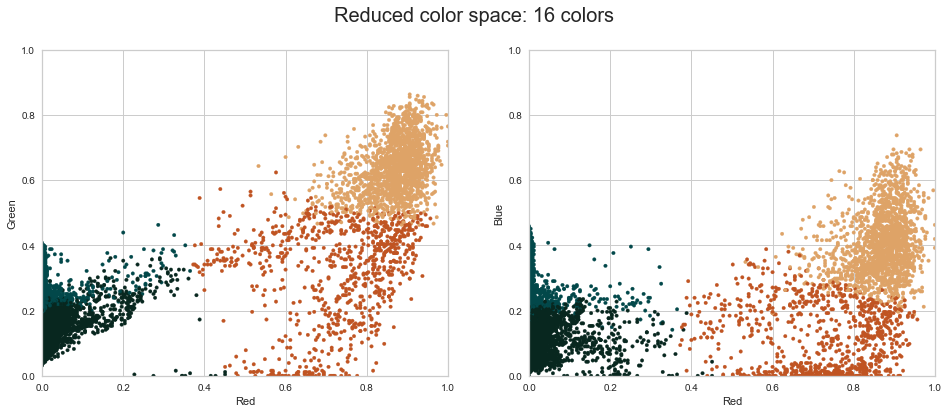

In [23]:
import warnings; warnings.simplefilter('ignore')  

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(4)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

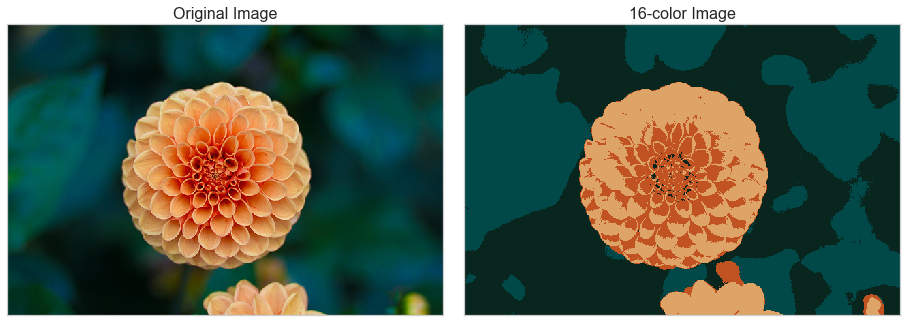

In [24]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

[For more info on using clustering for color compression](https://towardsdatascience.com/image-compression-using-k-means-clustering-aa0c91bb0eeb)